Aerofit Descriptive Stats & Probability

In [1]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import warnings
warnings.filterwarnings('ignore')

1. Defining Problem Statement and Analysing basic metrics (10 Points):
The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

* Perform basic EDA to see the pattern of sales and create customer segements
* Get better insights using probabibilty concepts and visualize it and create an action plan
        
* Observations on 
    - shape of data 
    - data types of all the attributes
    - conversion of categorical attributes to 'category' (If required)
    -  statistical summary

In [2]:
df=pd.read_csv('aerofit.txt')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [3]:
#Shape of data
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns",'\n','-'*50)
print(f"Number of duplicate rows in data = {df.duplicated().sum()}","\n",'-'*50)
#Data types of all attributes
print(df.info())

The dataset has 180 rows and 9 columns 
 --------------------------------------------------
Number of duplicate rows in data = 0 
 --------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB
None


In [4]:
df.dtypes.value_counts()

int64     6
object    3
dtype: int64

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,KP281,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


2. Non-Graphical Analysis: Value counts and unique attributes ​​(10 Points)

In [6]:
for col in df.columns:
    print(f"unique {col} values = {df[col].nunique()}")

unique Product values = 3
unique Age values = 32
unique Gender values = 2
unique Education values = 8
unique MaritalStatus values = 2
unique Usage values = 6
unique Fitness values = 5
unique Income values = 62
unique Miles values = 37


In [7]:
for col in df.columns:
    if df[col].nunique()<20:
        print(col,'\n',df[col].value_counts(),'\n','-'*50)

Product 
 KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64 
 --------------------------------------------------
Gender 
 Male      104
Female     76
Name: Gender, dtype: int64 
 --------------------------------------------------
Education 
 16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64 
 --------------------------------------------------
MaritalStatus 
 Partnered    107
Single        73
Name: MaritalStatus, dtype: int64 
 --------------------------------------------------
Usage 
 3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64 
 --------------------------------------------------
Fitness 
 3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64 
 --------------------------------------------------


3. Visual Analysis - Univariate & Bivariate (30 Points)
    - For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)
    - For categorical variable(s): Boxplot (10 Points)
    - For correlation: Heatmaps, Pairplots(10 Points)

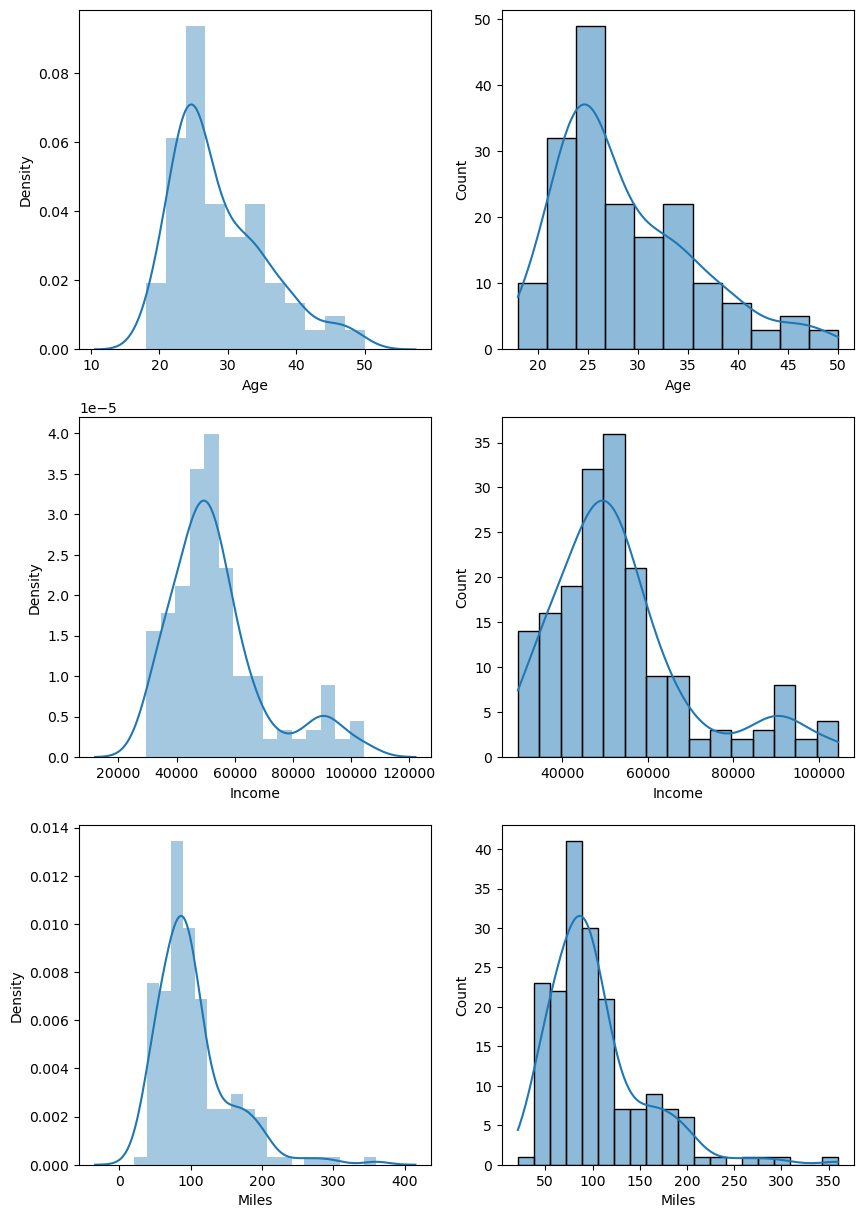

In [8]:
#Univariate Analysis for continuous variables
cont_var=['Age','Income','Miles']
plt.figure(figsize=(10,15))
for i in range(1,len(cont_var)+1):
    plt.subplot(3,2,2*i-1)
    sns.distplot(df[cont_var[i-1]],kde=True)
    plt.subplot(3,2,2*i)
    sns.histplot(df[cont_var[i-1]],kde=True)
plt.show()

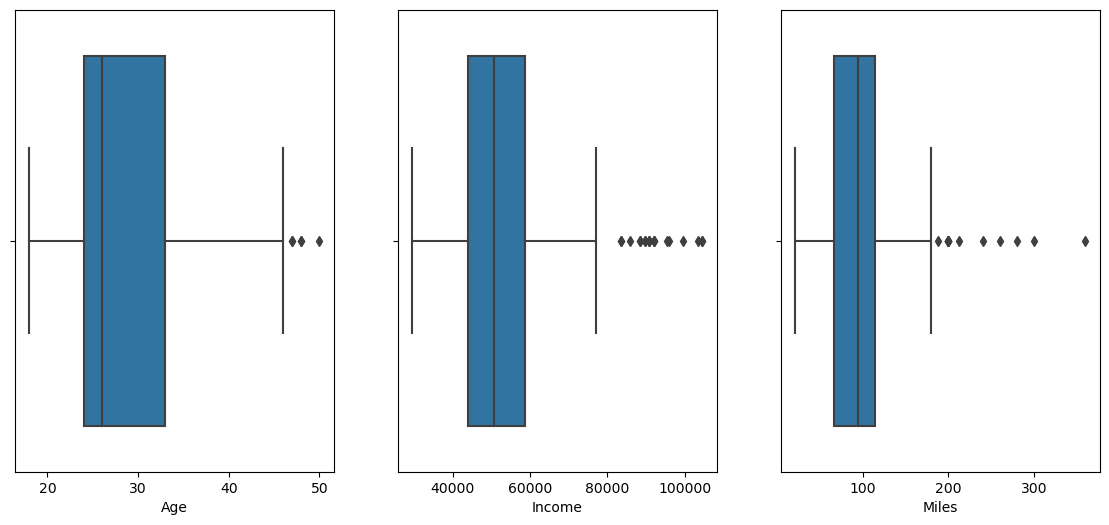

In [9]:
plt.figure(figsize=(14,6))
for i in range(len(cont_var)):
    plt.subplot(1,3,i+1)
    sns.boxplot(x=cont_var[i], data=df)

In [10]:
cont_var

['Age', 'Income', 'Miles']

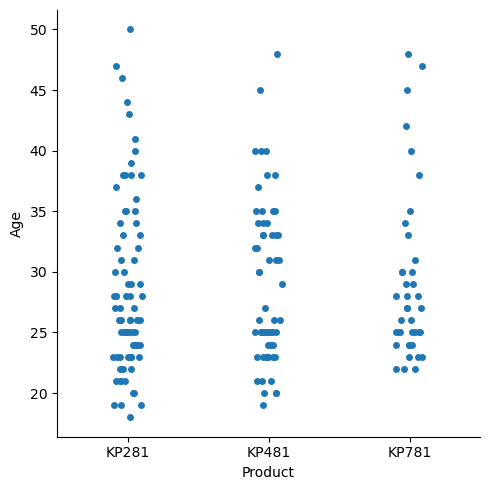

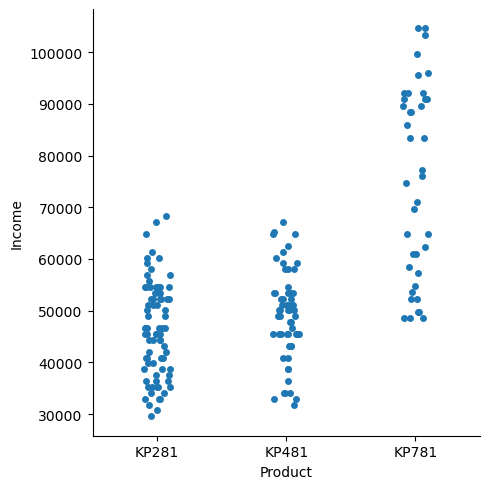

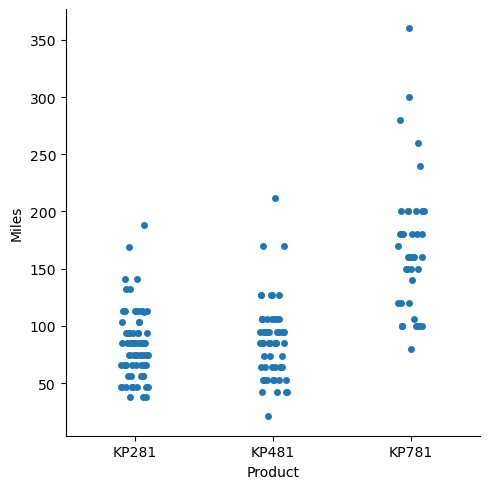

In [11]:
for i in cont_var:
    sns.catplot(data=df,x='Product',y=i)
plt.show()

In [12]:
cont_var

['Age', 'Income', 'Miles']

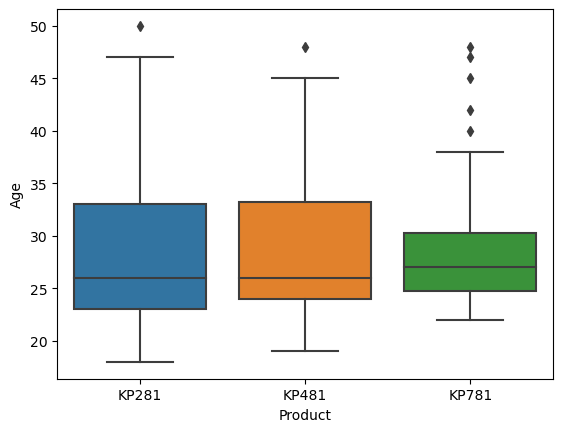

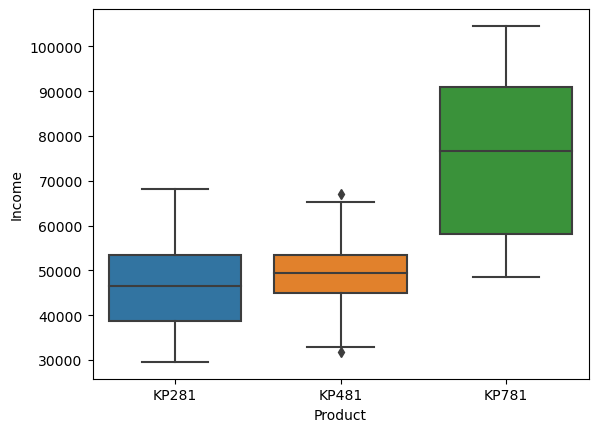

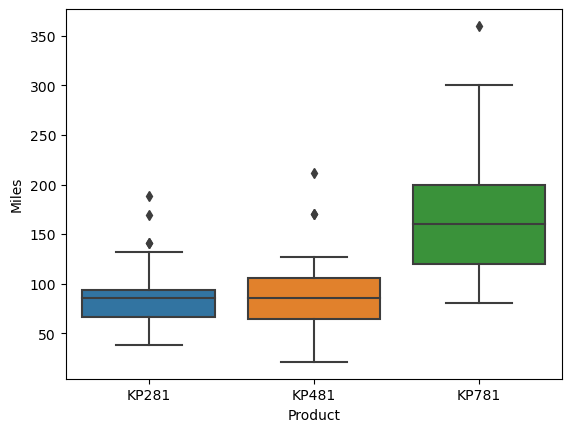

In [13]:
for i in cont_var:
    sns.boxplot(data=df,x='Product',y=i)
    plt.show()

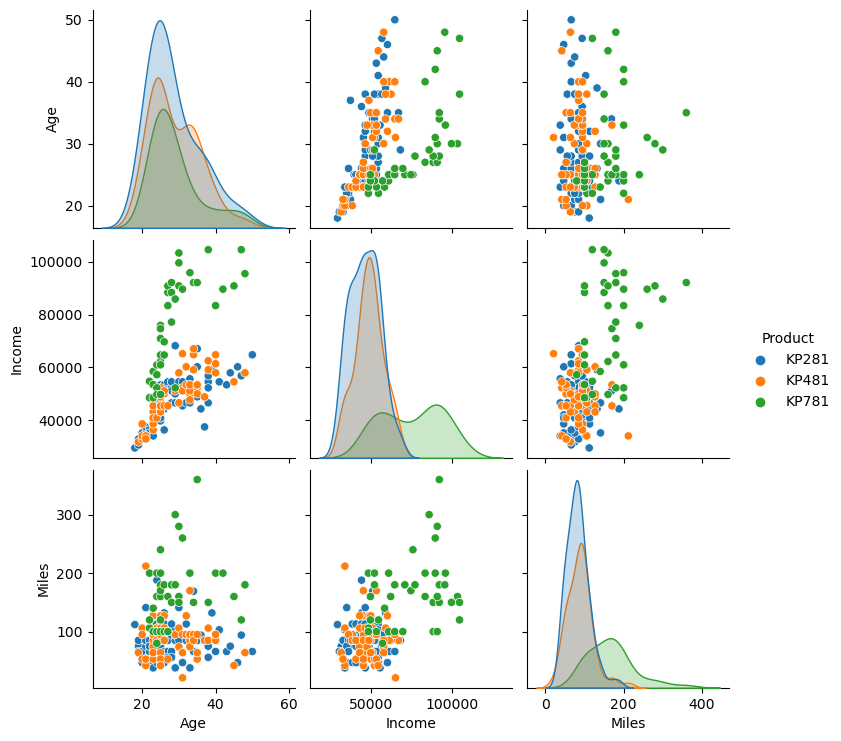

In [14]:
sns.pairplot(df[['Age','Income','Miles','Product']],hue='Product')

In [15]:
df.groupby('Product')['Income'].mean()

Product
KP281    46418.025
KP481    48973.650
KP781    75441.575
Name: Income, dtype: float64

In [16]:
df.groupby('Product')['Miles'].mean()

Product
KP281     82.787500
KP481     87.933333
KP781    166.900000
Name: Miles, dtype: float64

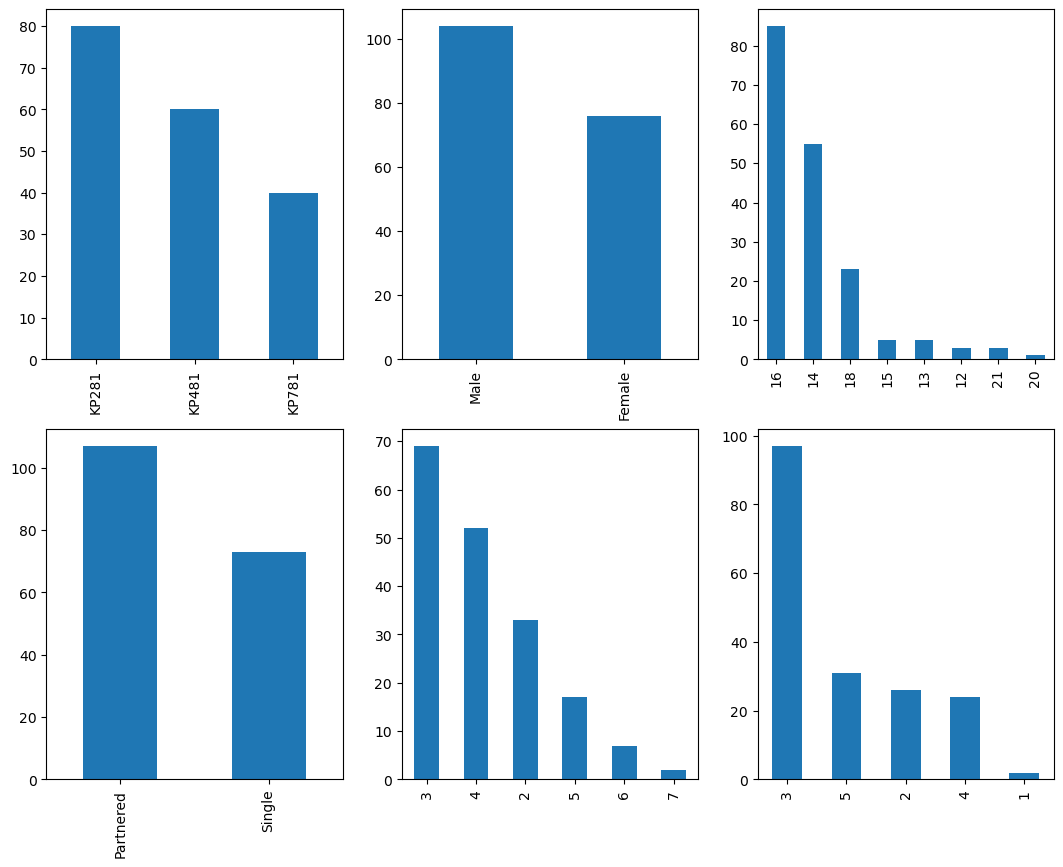

In [17]:
#Categorical variables
plt.figure(figsize=(13,10))
plt.subplot(2,3,1)
df['Product'].value_counts().plot(kind='bar')
plt.subplot(2,3,2)
df['Gender'].value_counts().plot(kind='bar')
plt.subplot(2,3,3)
df['Education'].value_counts()[:10].plot(kind='bar')
plt.subplot(2,3,4)
df['MaritalStatus'].value_counts().plot(kind='bar')
plt.subplot(2,3,5)
df['Usage'].value_counts().plot(kind='bar')
plt.subplot(2,3,6)
df['Fitness'].value_counts().plot(kind='bar')
plt.show()

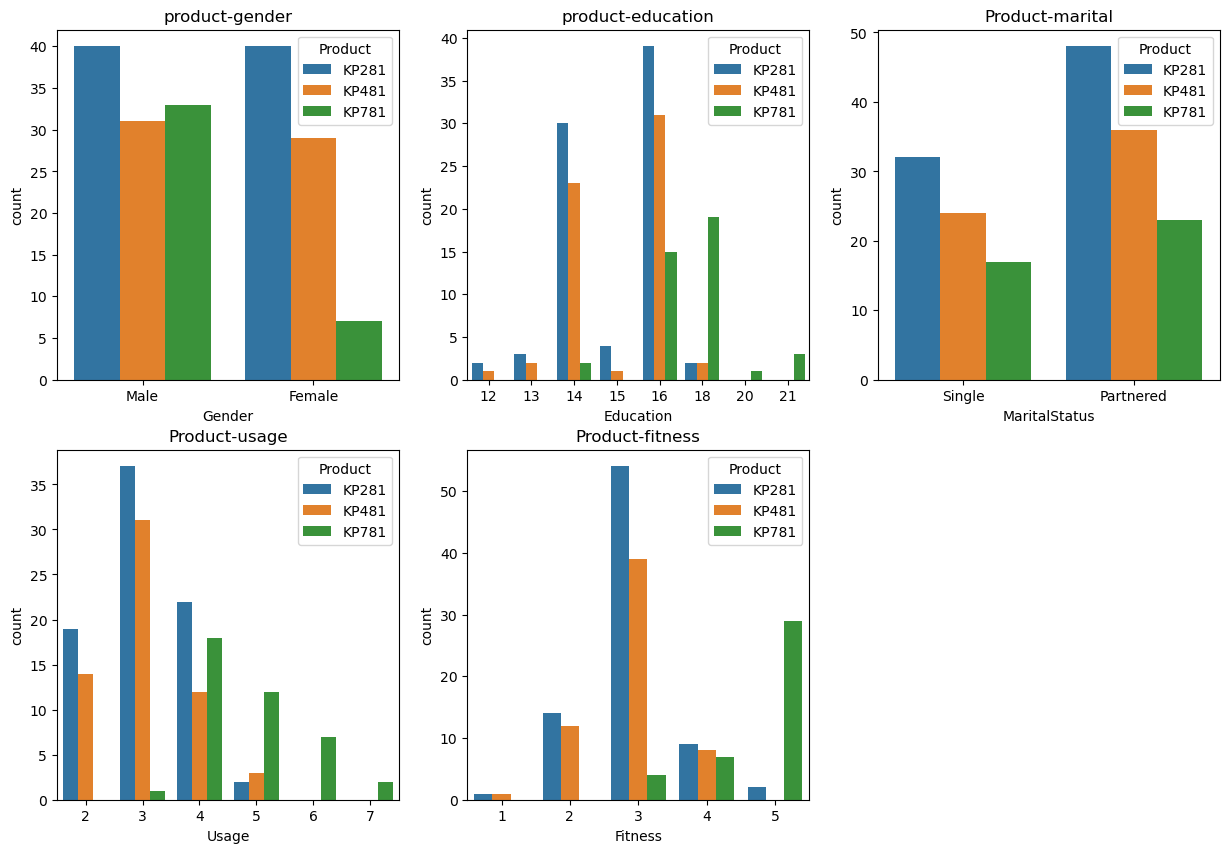

In [18]:
# Comparison of Products with respect to categorical vars
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.countplot(df,x='Gender',hue='Product')
plt.title('product-gender')
plt.subplot(2,3,2)
sns.countplot(df,x='Education',hue='Product')
plt.title('product-education')
plt.subplot(2,3,3)
sns.countplot(df,x='MaritalStatus',hue='Product')
plt.title('Product-marital')
plt.subplot(2,3,4)
sns.countplot(df,x='Usage',hue='Product')
plt.title('Product-usage')
plt.subplot(2,3,5)
sns.countplot(df,x='Fitness',hue='Product')
plt.title('Product-fitness')
plt.show()

In [19]:
def prod_prob_catvar(var):
    print(var)
    df1 = pd.crosstab(index=df[str(var)], columns=[df['Product']])
    for i in df1.index:
        print(f"P({i}):{round(df1.loc[i].sum()/len(df),2)}")

    for i in df1.columns:
        for j in df1.index:
            print(f"P({i}/{j}):{round(df1[i][j]/df1.loc[j].sum(),2)}")
    

In [20]:
for i in ['Gender','MaritalStatus','Usage','Fitness','Education']:
    prod_prob_catvar(i)
    print('*'*50)

Gender
P(Female):0.42
P(Male):0.58
P(KP281/Female):0.53
P(KP281/Male):0.38
P(KP481/Female):0.38
P(KP481/Male):0.3
P(KP781/Female):0.09
P(KP781/Male):0.32
**************************************************
MaritalStatus
P(Partnered):0.59
P(Single):0.41
P(KP281/Partnered):0.45
P(KP281/Single):0.44
P(KP481/Partnered):0.34
P(KP481/Single):0.33
P(KP781/Partnered):0.21
P(KP781/Single):0.23
**************************************************
Usage
P(2):0.18
P(3):0.38
P(4):0.29
P(5):0.09
P(6):0.04
P(7):0.01
P(KP281/2):0.58
P(KP281/3):0.54
P(KP281/4):0.42
P(KP281/5):0.12
P(KP281/6):0.0
P(KP281/7):0.0
P(KP481/2):0.42
P(KP481/3):0.45
P(KP481/4):0.23
P(KP481/5):0.18
P(KP481/6):0.0
P(KP481/7):0.0
P(KP781/2):0.0
P(KP781/3):0.01
P(KP781/4):0.35
P(KP781/5):0.71
P(KP781/6):1.0
P(KP781/7):1.0
**************************************************
Fitness
P(1):0.01
P(2):0.14
P(3):0.54
P(4):0.13
P(5):0.17
P(KP281/1):0.5
P(KP281/2):0.54
P(KP281/3):0.56
P(KP281/4):0.38
P(KP281/5):0.06
P(KP481/1):0.5
P(KP481/2):0

<Axes: >

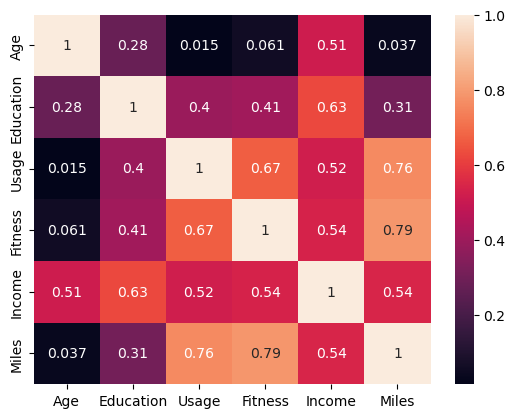

In [21]:
sns.heatmap(df.corr(),annot=True)

In [22]:
#Need to create categories for Age,Income,Miles,Education

In [23]:
df['age_cat']=pd.cut(df["Age"], bins =[0,21,30,40,60], include_lowest=True, labels=["Teen(<=20)","20's(21-30)","30's(31-40)","40's(>40)"])
df['edu_cat']=pd.cut(df["Education"], bins =[0,14,18,30], include_lowest=True, labels=["12-14","15-18",">18"])
df['income_cat']=round(df['Income']/1000)
df['income_cat']=pd.cut(df["income_cat"], bins =[0,50,70,120], include_lowest=True, labels=["<=50k","51-70k",">70k"])
df['miles_cat']=pd.cut(df["Miles"], bins =[0,70,100,500], include_lowest=True, labels=["<=70","70-100","100 above"])

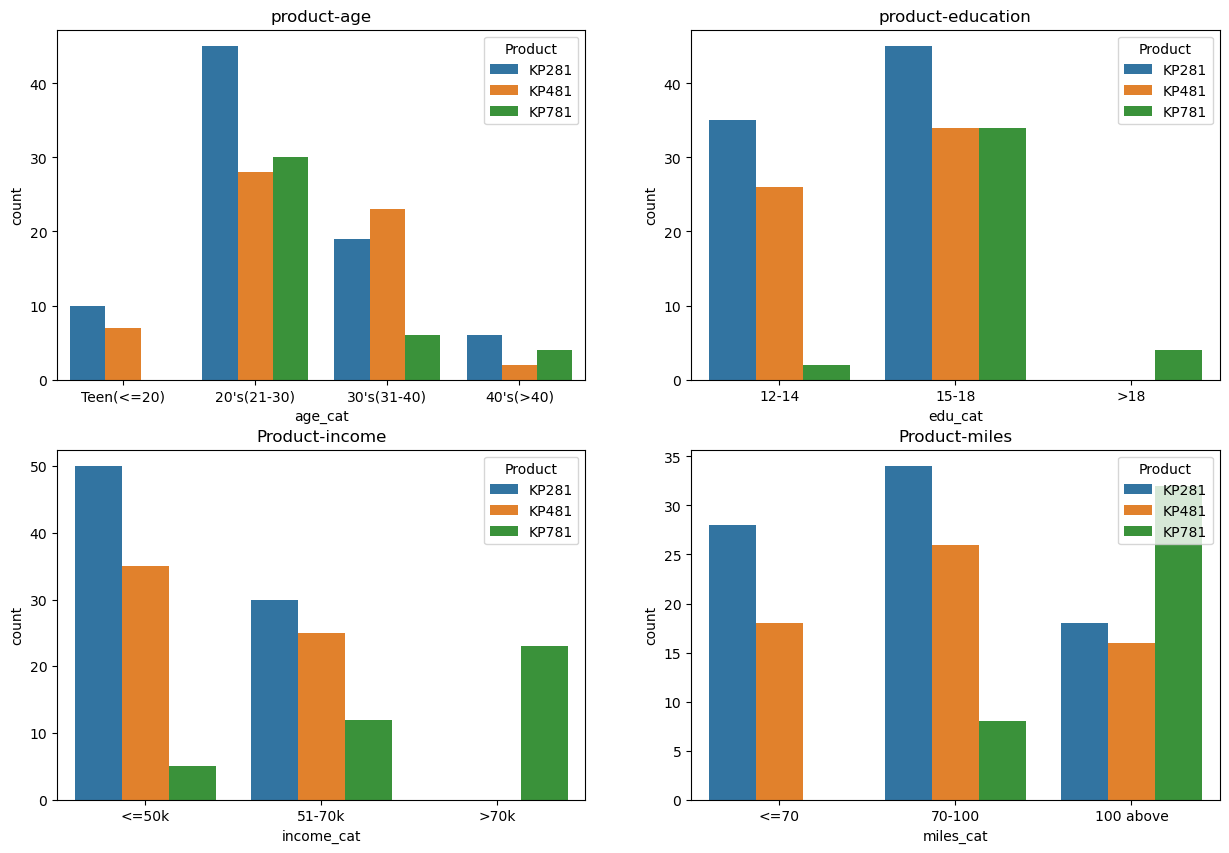

In [24]:
# Comparison of Products with respect to created categorical vars
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(df,x='age_cat',hue='Product')
plt.title('product-age')
plt.subplot(2,2,2)
sns.countplot(df,x='edu_cat',hue='Product')
plt.title('product-education')
plt.subplot(2,2,3)
sns.countplot(df,x='income_cat',hue='Product')
plt.title('Product-income')
plt.subplot(2,2,4)
sns.countplot(df,x='miles_cat',hue='Product')
plt.title('Product-miles')
plt.show()

In [25]:
created_cats=['age_cat','edu_cat','income_cat','miles_cat']
for i in created_cats:
    prod_prob_catvar(i)
    print('*'*50)

age_cat
P(Teen(<=20)):0.09
P(20's(21-30)):0.57
P(30's(31-40)):0.27
P(40's(>40)):0.07
P(KP281/Teen(<=20)):0.59
P(KP281/20's(21-30)):0.44
P(KP281/30's(31-40)):0.4
P(KP281/40's(>40)):0.5
P(KP481/Teen(<=20)):0.41
P(KP481/20's(21-30)):0.27
P(KP481/30's(31-40)):0.48
P(KP481/40's(>40)):0.17
P(KP781/Teen(<=20)):0.0
P(KP781/20's(21-30)):0.29
P(KP781/30's(31-40)):0.12
P(KP781/40's(>40)):0.33
**************************************************
edu_cat
P(12-14):0.35
P(15-18):0.63
P(>18):0.02
P(KP281/12-14):0.56
P(KP281/15-18):0.4
P(KP281/>18):0.0
P(KP481/12-14):0.41
P(KP481/15-18):0.3
P(KP481/>18):0.0
P(KP781/12-14):0.03
P(KP781/15-18):0.3
P(KP781/>18):1.0
**************************************************
income_cat
P(<=50k):0.5
P(51-70k):0.37
P(>70k):0.13
P(KP281/<=50k):0.56
P(KP281/51-70k):0.45
P(KP281/>70k):0.0
P(KP481/<=50k):0.39
P(KP481/51-70k):0.37
P(KP481/>70k):0.0
P(KP781/<=50k):0.06
P(KP781/51-70k):0.18
P(KP781/>70k):1.0
**************************************************
miles_cat
P(<=70)

4. Missing Value & Outlier Detection (10 Points)

In [26]:
#Missing value check
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
age_cat          0
edu_cat          0
income_cat       0
miles_cat        0
dtype: int64

In [27]:
#Outlier check
def outlier(var):
    print(f"{var}:q1={np.percentile(df['Age'],25)}")
    print(f"{var}:q2={np.percentile(df['Age'],50)}")
    print(f"{var}:q3={np.percentile(df['Age'],75)}")
    print(f"{var}:iqr={np.percentile(df['Age'],75)-np.percentile(df['Age'],25)}")
    q1,q3=np.percentile(df['Age'],25),np.percentile(df['Age'],75)
    iqr=q3-q1
    a=q1-1.35*iqr
    b=q3+1.35*iqr
    print(f"q1-1.35*iqr={a} and",end=" ")
    print(f"q3+1.35*iqr={b}")
    print(f"total outliers:{len(df[(df[var]<a) | (df[var]>b)][var].values)}")
    print(f"outlier values for {var} \n {df[(df[var]<a) | (df[var]>b)][var].values}")
    
outlier('Age')

Age:q1=24.0
Age:q2=26.0
Age:q3=33.0
Age:iqr=9.0
q1-1.35*iqr=11.85 and q3+1.35*iqr=45.15
total outliers:6
outlier values for Age 
 [46 47 50 48 47 48]


In [28]:
for i in cont_var:
    outlier(i)

Age:q1=24.0
Age:q2=26.0
Age:q3=33.0
Age:iqr=9.0
q1-1.35*iqr=11.85 and q3+1.35*iqr=45.15
total outliers:6
outlier values for Age 
 [46 47 50 48 47 48]
Income:q1=24.0
Income:q2=26.0
Income:q3=33.0
Income:iqr=9.0
q1-1.35*iqr=11.85 and q3+1.35*iqr=45.15
total outliers:180
outlier values for Income 
 [ 29562  31836  30699  32973  35247  32973  35247  32973  35247  37521
  36384  35247  36384  35247  38658  40932  34110  39795  38658  34110
  38658  40932  42069  44343  45480  42069  46617  48891  45480  53439
  39795  40932  40932  43206  44343  52302  53439  51165  36384  44343
  50028  45480  54576  45480  46617  52302  52302  54576  54576  51165
  68220  46617  50028  46617  54576  54576  45480  46617  52302  55713
  46617  51165  52302  48891  60261  67083  44343  37521  46617  54576
  52302  56850  59124  61398  54576  53439  57987  60261  56850  64809
  31836  32973  34110  38658  34110  34110  32973  36384  38658  45480
  45480  43206  40932  45480  40932  48891  50028  45480  43206 

In [29]:
#5. Business Insights based on Non-Graphical and Visual Analysis (10 Points)
# Comments on the range of attributes
# Comments on the distribution of the variables and relationship between them
# Comments for each univariate and bivariate plot
#6.  Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications
# Simple action items that everyone can understand

Comments about the attributes
- The df has 180 rows and 6 columns , Age,income,miles are continuous and rest are mixture of nominal and ordinal variables
- There are no missing values in any variable
- The age is lightly right skewed with majority data in [22-37] with range[18-50],income has range of [29k-100k] with majority data under 70k, miles has range of [21,360] with majority under 175 miles.They have a total of 6,180,172 outliers respectively
- Overall we see that KP281>KP481>KP781.KP281 is more or less popular across ages ,KP481 is popular among 20s and 30-35,KP781 is popular mostly in the 20s age group. The overall product trend is followed with respect to income too, except for people with income >70k they seem to prefer KP781. The overall product trend is followed for people who's mile count <=100 , KP781 people run more than 100 miles.
- Male>female,Partnered>Single,descending order in usage and fitness are [3,4,2,5,6,7] and [3,5,2,4,1] respectively.
- Overall we see that KP281>KP481>KP781.KP781 is more popular in men and people with education level 16 above,people with fitness>=4
- We see that decent correlation among -(age,fitness),+(age,incoem),+(education,income),+(usage,fitness),+(usage,miles)

#Probabilities
Gender
P(Female):0.42
P(Male):0.58
P(KP281/Female):0.53
P(KP281/Male):0.38
P(KP481/Female):0.38
P(KP481/Male):0.3
P(KP781/Female):0.09
P(KP781/Male):0.32
**************************************************
MaritalStatus
P(Partnered):0.59
P(Single):0.41
P(KP281/Partnered):0.45
P(KP281/Single):0.44
P(KP481/Partnered):0.34
P(KP481/Single):0.33
P(KP781/Partnered):0.21
P(KP781/Single):0.23
**************************************************
Usage
P(2):0.18
P(3):0.38
P(4):0.29
P(5):0.09
P(6):0.04
P(7):0.01
P(KP281/2):0.58
P(KP281/3):0.54
P(KP281/4):0.42
P(KP281/5):0.12
P(KP281/6):0.0
P(KP281/7):0.0
P(KP481/2):0.42
P(KP481/3):0.45
P(KP481/4):0.23
P(KP481/5):0.18
P(KP481/6):0.0
P(KP481/7):0.0
P(KP781/2):0.0
P(KP781/3):0.01
P(KP781/4):0.35
P(KP781/5):0.71
P(KP781/6):1.0
P(KP781/7):1.0
**************************************************
Fitness
P(1):0.01
P(2):0.14
P(3):0.54
P(4):0.13
P(5):0.17
P(KP281/1):0.5
P(KP281/2):0.54
P(KP281/3):0.56
P(KP281/4):0.38
P(KP281/5):0.06
P(KP481/1):0.5
P(KP481/2):0.46
P(KP481/3):0.4
P(KP481/4):0.33
P(KP481/5):0.0
P(KP781/1):0.0
P(KP781/2):0.0
P(KP781/3):0.04
P(KP781/4):0.29
P(KP781/5):0.94
**************************************************
Education
P(12):0.02
P(13):0.03
P(14):0.31
P(15):0.03
P(16):0.47
P(18):0.13
P(20):0.01
P(21):0.02
P(KP281/12):0.67
P(KP281/13):0.6
P(KP281/14):0.55
P(KP281/15):0.8
P(KP281/16):0.46
P(KP281/18):0.09
P(KP281/20):0.0
P(KP281/21):0.0
P(KP481/12):0.33
P(KP481/13):0.4
P(KP481/14):0.42
P(KP481/15):0.2
P(KP481/16):0.36
P(KP481/18):0.09
P(KP481/20):0.0
P(KP481/21):0.0
P(KP781/12):0.0
P(KP781/13):0.0
P(KP781/14):0.04
P(KP781/15):0.0
P(KP781/16):0.18
P(KP781/18):0.83
P(KP781/20):1.0
P(KP781/21):1.0
**************************************************
age_cat
P(Teen(<=20)):0.09
P(20's(21-30)):0.57
P(30's(31-40)):0.27
P(40's(>40)):0.07
P(KP281/Teen(<=20)):0.59
P(KP281/20's(21-30)):0.44
P(KP281/30's(31-40)):0.4
P(KP281/40's(>40)):0.5
P(KP481/Teen(<=20)):0.41
P(KP481/20's(21-30)):0.27
P(KP481/30's(31-40)):0.48
P(KP481/40's(>40)):0.17
P(KP781/Teen(<=20)):0.0
P(KP781/20's(21-30)):0.29
P(KP781/30's(31-40)):0.12
P(KP781/40's(>40)):0.33
**************************************************
edu_cat
P(12-14):0.35
P(15-18):0.63
P(>18):0.02
P(KP281/12-14):0.56
P(KP281/15-18):0.4
P(KP281/>18):0.0
P(KP481/12-14):0.41
P(KP481/15-18):0.3
P(KP481/>18):0.0
P(KP781/12-14):0.03
P(KP781/15-18):0.3
P(KP781/>18):1.0
**************************************************
income_cat
P(<=50k):0.5
P(51-70k):0.37
P(>70k):0.13
P(KP281/<=50k):0.56
P(KP281/51-70k):0.45
P(KP281/>70k):0.0
P(KP481/<=50k):0.39
P(KP481/51-70k):0.37
P(KP481/>70k):0.0
P(KP781/<=50k):0.06
P(KP781/51-70k):0.18
P(KP781/>70k):1.0
**************************************************
miles_cat
P(<=70):0.26
P(70-100):0.38
P(100 above):0.37
P(KP281/<=70):0.61
P(KP281/70-100):0.5
P(KP281/100 above):0.27
P(KP481/<=70):0.39
P(KP481/70-100):0.38
P(KP481/100 above):0.24
P(KP781/<=70):0.0
P(KP781/70-100):0.12
P(KP781/100 above):0.48
**************************************************

Customer Profiling - User Categorization

KP281:
The KP281 model is an affordable entry-level product that enjoys high sales. It appeals to both male and female customers, with an equal number of buyers from both genders. On average, customers walk or run approximately 70 to 90 miles per week using this product, utilizing it 3 to 4 times a week. The fitness level of KP281 users is considered average. This product caters to a wide age range and various fitness levels.

KP481:
Falling into the intermediate price range, the KP481 model attracts users with varying fitness levels ranging from bad to average shape, depending on their usage. Customers who prefer the KP481 model use it less frequently but cover more miles per week, averaging between 70 to 130 or more miles. This model has a higher probability of being purchased by female customers compared to males. It is particularly recommended for intermediate-level female users. Customers in the adult, teen, and mid-age categories are the primary consumers of KP481.

KP781:
The KP781 model is the least sold product due to its higher price and appeal to customers who engage in extensive exercise and cover more miles. Users of this product walk or run an average of 120 to 200 or more miles per week, using it at least 4 to 5 times weekly. There is a high probability (more than 90%) that individuals in excellent shape prefer KP781. Among female users, those who engage in extensive exercise and cover an average of 180 miles are more likely to use KP781 compared to their male counterparts. The probability of male customers purchasing KP781 (31.73%) is significantly higher than that of females (9.21%). Furthermore, the probability of a single person purchasing KP781 is higher than that of married customers. Hence, KP781 is recommended for single individuals who exercise extensively. This product is popular among older people above the age of 45 and adults.

Recommendations:
To customers who exercise and run more frequently, covering greater distances, and have a higher income, KP781 is recommended. Given that KP781 has the smallest market share among the products (22.2%), it is advisable to recommend it to customers who exercise at an intermediate to extensive level, especially if they are considering the KP481 model. The targeted age category for KP781 is adults and those above the age of 45.

For female customers who engage in more running or walking, KP481 is specifically recommended, as data indicates a higher probability of purchase. The statistical summary regarding fitness levels and miles covered for KP481 is not as impressive as that of the cheaper KP281 model. Price may be a determining factor, leading customers to prefer purchasing KP281. Therefore, it is recommended to make necessary improvements to the KP481 product to enhance customer experience.